# TP ANALYSE DE SENTIMENT - PARTIE LAPTOPS
Le jeu de données Laptop_Train_v0.2 est composé de 3045 phrases anglaises extraites des  commentaires  des  clients  sur  les  ordinateurs  portables.  
Des  annotateurs  humains expérimentés ont annoté les termes d'aspect des phrases et leurs polarités.
Les valeurs possibles pour la polarité des aspects sont : “positive”, “negative”, “conflict”, “neutral”. 

Le jeu de données Laptop_Train est composé de 3045 phrases anglaises extraites 
des commentaires des clients sur les ordinateurs portables. Des annotateurs humains 
expérimentés ont annoté les termes d'aspect des phrases et leurs polarités

## Première tâche : analyse des sentiments du jeux de données sur les restaurants 
On commence par télécharger les fichiers suivants qui se trouvent dans le repertoire TPSA/datasets sur Moodle :
* Laptop_Train.xml (ensemble d'entrainement)
* Laptop_Test_Gold.xml (ensemble de test)
--------------------------------------------------------------------------------------------------------------------------

     Objectif 1: calculer la polarité des mots dans les deux jeux de données à l’aide d’un lexicon de sentiment. 
Avant d’utiliser le lexicon pour calculer la polarité des mots contenus dans les phrases dans les deux jeux de données, il est nécessaire de faire un pré-traitement des phases (negation, tokenizer, PoS tagger, et NER). 
* Vous devez implémenter un système d'extraction d'informations simple. Le texte brut de chaque phrase est subdivisée en mots à l'aide d'un tokenizer. 
* Ensuite, chaque phrase est étiquetée avec des balises de partie de discours (PoS tagger), ~~ce qui s'avérera très utile à l'étape suivante, la détection d'entités nommées (NER).~~

**Remarque**
- La NER n'est pas nécessaire ici, car nous avons déjà les terms à identifier dans le Train et le test. 
- Les étapes à suivres sont alors les suivantes :

* **Chargement**
    * Charger les données depuis les fichiers en récupérant le terme et toutes ses informations (le term lui meme, son emplacement, sa phrase, sa polarité)
    * Transformer les phrases en token avec PosTag afin de les ajouter dans notre dataframe et d'avoir des infos supplémentaires sur la structure de la phrase.
* **Sentiments**
    * Une  fois  que  le  pré-traitement  des  phrases  est  terminé,  vous  pouvez  télécharger  le lexicon SentiWordNet (https://github.com/aesuli/SentiWordNet).
    * Apres le téléchargement, vous devez identifier la polarité associé a chaque mot dans les phrases contenues dans les jeux de données (fichiers Train et Test, 4 fichiers à traiter) en utilisant le lexicon SentiWordNet:
     - pour chaque mot (que vous avez identifié avec le tokenizer, stop words exclues) vous cherchez si le mot est present dans le lexicon. 
     - S’il est present, alors vous assignez à ce mot la polarité positive/negative associée au mot dans le lexicon ansi que le degré associé.A vous de choisir le format (balises) pour stocker ces informations, qui vous seront utiles après. 
     - S’il n’est pas present, vous pouvez passer au mot suivant.
     - Enfin,  vous  devez  générer  une  visualisation  des  données  à  travers  des  graphiques  pour montrer combien de mots ont une polarité positive / negative dans chaque fichier.
-----------------------------------------------------------------------------------------------------------------------------------------

In [2]:
#SPACY
import en_core_web_sm   # téléchargement ici : https://spacy.io/models/en

#NLTK
import nltk
from nltk import ne_chunk, pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('sentiwordnet')

#AUTRES LIBRAIRIES
import pandas as pd
import xml.etree.ElementTree as et 
import matplotlib.pyplot as plt

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\belka\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


* ### **CHARGEMENT**
------------------------------------------------------------

Les valeurs possibles pour la polarité des aspects sont : “positive”, “negative”, “conflict”, “neutral”. 
Les valeurs possibles des categories sont : “food”, “service”, “price”, “ambience”, “anecdotes/miscellaneous”.
* Nous ne nous intéressons qu'au polarité des terms

In [3]:
# ----- TRAIN DATAFRAME ----- #
l = []

xtree = et.parse("Laptop_Train.xml")
xroot = xtree.getroot()
for sentence in xroot.findall('sentence'):
    idi = sentence.get('id')
    text = sentence.find('text').text
    
    #print(idi, text)
    for neighbor in sentence.iter('aspectTerm'):
        # On mets 'id' et 'text' dans le dictionnaire avec toutes les variable qui nous intéresse
        neighbor.attrib['id'] = idi
        neighbor.attrib['text'] = text
        # on stock tous les dictionnaires crées dans une liste
        l.append(neighbor.attrib)
df_train = pd.DataFrame(l)
df_train.head(5)

,term,polarity,from,to,id,text
0,cord,neutral,41,45,2339,I charge it at night and skip taking the cord ...
1,battery life,positive,74,86,2339,I charge it at night and skip taking the cord ...
2,service center,negative,27,41,1316,The tech guy then said the service center does...
3,"""sales"" team",negative,109,121,1316,The tech guy then said the service center does...
4,tech guy,neutral,4,12,1316,The tech guy then said the service center does...


In [4]:
# ----- TEST DATAFRAME ----- #
l = []

xtree = et.parse("Laptop_Test_Gold.xml")
xroot = xtree.getroot()
for sentence in xroot.findall('sentence'):
    idi = sentence.get('id')
    text = sentence.find('text').text
    
    #print(idi, text)
    for neighbor in sentence.iter('aspectTerm'):
        # On mets 'id' et 'text' dans le dictionnaire avec toutes les variable qui nous intéresse
        neighbor.attrib['id'] = idi
        neighbor.attrib['text'] = text
        # on stock tous les dictionnaires crées dans une liste
        l.append(neighbor.attrib)
df_test = pd.DataFrame(l)
df_test.head(5)

,term,polarity,from,to,id,text
0,aluminum body,positive,12,25,2128,I liked the aluminum body.
1,screen,positive,20,26,81,Lightweight and the screen is beautiful!
2,build quality,negative,9,22,353,"From the build quality to the performance, eve..."
3,performance,negative,30,41,353,"From the build quality to the performance, eve..."
4,costing,positive,30,37,655,It was truly a great computer costing less tha...


* ### Tokenization and PosTag
Utilisation de en_core_web_sm de Spacy car NLTK renvoie une erreur 

#### On recharge cette fois avec les posTag

In [5]:
l = []
nlp = en_core_web_sm.load()

xtree = et.parse("Laptop_Train.xml")
xroot = xtree.getroot()


for sentence in xroot.findall('sentence'):
    # récupération de l'id et de la phrase
    idi = sentence.get('id')
    text = sentence.find('text').text
    
    #Tokenization du text
    tokenize_Text = nlp(text)

    #print(idi, text)
    for neighbor in sentence.iter('aspectTerm'):
        # On mets 'id' et 'text' dans le dictionnaire avec toutes les variable qui nous intéresse
        neighbor.attrib['id'] = idi
        neighbor.attrib['text'] = text
        neighbor.attrib['token_text'] = tokenize_Text
        # on stock tous les dictionnaires crées dans une liste
        l.append(neighbor.attrib)
df_train = pd.DataFrame(l)
df_train.head(5)

,term,polarity,from,to,id,text,token_text
0,cord,neutral,41,45,2339,I charge it at night and skip taking the cord ...,"(I, charge, it, at, night, and, skip, taking, ..."
1,battery life,positive,74,86,2339,I charge it at night and skip taking the cord ...,"(I, charge, it, at, night, and, skip, taking, ..."
2,service center,negative,27,41,1316,The tech guy then said the service center does...,"(The, tech, guy, then, said, the, service, cen..."
3,"""sales"" team",negative,109,121,1316,The tech guy then said the service center does...,"(The, tech, guy, then, said, the, service, cen..."
4,tech guy,neutral,4,12,1316,The tech guy then said the service center does...,"(The, tech, guy, then, said, the, service, cen..."


In [6]:
#on vérifie que les posTag ont bien été conservé
df_train.token_text[0]
[X.pos_ for X in  df_train.token_text[0]]

['PRON',
 'VERB',
 'PRON',
 'ADP',
 'NOUN',
 'CCONJ',
 'NOUN',
 'VERB',
 'DET',
 'NOUN',
 'ADP',
 'PRON',
 'SCONJ',
 'ADP',
 'DET',
 'PROPN',
 'PROPN',
 'NOUN',
 'PUNCT']

In [7]:
l = []
nlp = en_core_web_sm.load()

xtree = et.parse("Laptop_Test_Gold.xml")
xroot = xtree.getroot()


for sentence in xroot.findall('sentence'):
    # récupération de l'id et de la phrase
    idi = sentence.get('id')
    text = sentence.find('text').text
    
    #Tokenization du text
    tokenize_Text = nlp(text)

    #print(idi, text)
    for neighbor in sentence.iter('aspectTerm'):
        # On mets 'id' et 'text' dans le dictionnaire avec toutes les variable qui nous intéresse
        neighbor.attrib['id'] = idi
        neighbor.attrib['text'] = text
        neighbor.attrib['token_text'] = tokenize_Text
        # on stock tous les dictionnaires crées dans une liste
        l.append(neighbor.attrib)
df_test = pd.DataFrame(l)
df_test.head(5)

,term,polarity,from,to,id,text,token_text
0,aluminum body,positive,12,25,2128,I liked the aluminum body.,"(I, liked, the, aluminum, body, .)"
1,screen,positive,20,26,81,Lightweight and the screen is beautiful!,"(Lightweight, and, the, screen, is, beautiful, !)"
2,build quality,negative,9,22,353,"From the build quality to the performance, eve...","(From, the, build, quality, to, the, performan..."
3,performance,negative,30,41,353,"From the build quality to the performance, eve...","(From, the, build, quality, to, the, performan..."
4,costing,positive,30,37,655,It was truly a great computer costing less tha...,"(It, was, truly, a, great, computer, costing, ..."


* ### **SENTIMENTS**
------------------------------------------------------------

* Une  fois  que  le  pré-traitement  des  phrases  est  terminé,  vous  pouvez  télécharger  le lexicon SentiWordNet (https://github.com/aesuli/SentiWordNet).
* Apres le téléchargement, vous devez identifier la polarité associé a chaque mot dans les phrases contenues dans les jeux de données (fichiers Train et Test, 4 fichiers à traiter) en utilisant le lexicon SentiWordNet:
     - pour chaque mot (que vous avez identifié avec le tokenizer, stop words exclues) vous cherchez si le mot est present dans le lexicon. 
     - S’il est present, alors vous assignez à ce mot la polarité positive/negative associée au mot dans le lexicon ansi que le degré associé.A vous de choisir le format (balises) pour stocker ces informations, qui vous seront utiles après. 
     - S’il n’est pas present, vous pouvez passer au mot suivant.
     - Enfin,  vous  devez  générer  une  visualisation  des  données  à  travers  des  graphiques  pour montrer combien de mots ont une polarité positive / negative dans chaque fichier. 
------------------------------------------------------------

* #### Assigner la polarité chaque mot et ajouter dans la dataframe

In [8]:
#On ajoute deux colonnes vides à nos dataframe train et test
#Une pour le score de chaque mot
#df_train.insert(6,'Score_by_word',"")
df_test.insert(6,'Score_by_word',"")
#une pour avoir chaque mot que sentiword a détécté
#df_train.insert(7,'Sentiword',"")
df_test.insert(7,'Sentiword',"")


df_test.head(4)

,term,polarity,from,to,id,text,Score_by_word,Sentiword,token_text
0,aluminum body,positive,12,25,2128,I liked the aluminum body.,,,"(I, liked, the, aluminum, body, .)"
1,screen,positive,20,26,81,Lightweight and the screen is beautiful!,,,"(Lightweight, and, the, screen, is, beautiful, !)"
2,build quality,negative,9,22,353,"From the build quality to the performance, eve...",,,"(From, the, build, quality, to, the, performan..."
3,performance,negative,30,41,353,"From the build quality to the performance, eve...",,,"(From, the, build, quality, to, the, performan..."


In [12]:
#On ajoute deux colonnes vides à nos dataframe train et test
#Une pour le score de chaque mot
#df_train.insert(6,'Score_by_word',"")
df_train.insert(6,'Score_by_word',"")
#une pour avoir chaque mot que sentiword a détécté
#df_train.insert(7,'Sentiword',"")
df_train.insert(7,'Sentiword',"")


df_train.head(4)

,term,polarity,from,to,id,text,Score_by_word,Sentiword,token_text
0,cord,neutral,41,45,2339,I charge it at night and skip taking the cord ...,,,"(I, charge, it, at, night, and, skip, taking, ..."
1,battery life,positive,74,86,2339,I charge it at night and skip taking the cord ...,,,"(I, charge, it, at, night, and, skip, taking, ..."
2,service center,negative,27,41,1316,The tech guy then said the service center does...,,,"(The, tech, guy, then, said, the, service, cen..."
3,"""sales"" team",negative,109,121,1316,The tech guy then said the service center does...,,,"(The, tech, guy, then, said, the, service, cen..."


In [9]:
# ------ FONCTIONS POUR RECUPERATION DES SENTIMENTS DANS SENTIWORD NET ------ #

# Convertion des tags en simple WORDNET TAGS
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


#CHARGEMENT DES SENTIMENTS DETECTES
# renvoie une liste de score positif negatif ou neutre et renvoie une liste vide si le mot ne renvoie rien depuis senti wordnet.
def get_sentiment(word,tag):

    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Prend le premier sens du mot, le plus commun
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]


In [13]:
# ON REMPLIT LA COLONNE VIDE QU'ON A CREE 
# ---------- TRAIN DATAFRAME ---------------- #
ps = PorterStemmer()
i=0
for token in df_train.text :
    words_data= nltk.word_tokenize(str(token))
    tokens_without_sw = [word for word in words_data if not word in stopwords.words()]
    #print(tokens_without_sw)

    pos_val = nltk.pos_tag(tokens_without_sw)
    #print(pos_val)

    scores = []
    words_sentence = []

    for (x,y) in pos_val :
        scores.append(get_sentiment(x,y))
        words_sentence.append(x)

    df_train['Sentiword'][i] = words_sentence
    df_train['Score_by_word'][i] = scores
    i+=1

df_train.head(10)


,term,polarity,from,to,id,text,Score_by_word,Sentiword,token_text
0,cord,neutral,41,45,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
1,battery life,positive,74,86,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
2,service center,negative,27,41,1316,The tech guy then said the service center does...,"[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0....","[The, tech, guy, said, service, center, 1-to-1...","(The, tech, guy, then, said, the, service, cen..."
3,"""sales"" team",negative,109,121,1316,The tech guy then said the service center does...,"[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0....","[The, tech, guy, said, service, center, 1-to-1...","(The, tech, guy, then, said, the, service, cen..."
4,tech guy,neutral,4,12,1316,The tech guy then said the service center does...,"[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0....","[The, tech, guy, said, service, center, 1-to-1...","(The, tech, guy, then, said, the, service, cen..."
5,quality,positive,14,21,2005,"it is of high quality, has a killer GUI, is ex...","[[0.125, 0.25, 0.625], [0.375, 0.0, 0.625], []...","[high, quality, ,, killer, GUI, ,, extremely, ...","(it, is, of, high, quality, ,, has, a, killer,..."
6,GUI,positive,36,39,2005,"it is of high quality, has a killer GUI, is ex...","[[0.125, 0.25, 0.625], [0.375, 0.0, 0.625], []...","[high, quality, ,, killer, GUI, ,, extremely, ...","(it, is, of, high, quality, ,, has, a, killer,..."
7,applications,positive,118,130,2005,"it is of high quality, has a killer GUI, is ex...","[[0.125, 0.25, 0.625], [0.375, 0.0, 0.625], []...","[high, quality, ,, killer, GUI, ,, extremely, ...","(it, is, of, high, quality, ,, has, a, killer,..."
8,use,positive,143,146,2005,"it is of high quality, has a killer GUI, is ex...","[[0.125, 0.25, 0.625], [0.375, 0.0, 0.625], []...","[high, quality, ,, killer, GUI, ,, extremely, ...","(it, is, of, high, quality, ,, has, a, killer,..."
9,start up,positive,8,16,2789,Easy to start up and does not overheat as much...,"[[0.625, 0.25, 0.125], [], [], [0.0, 0.0, 1.0]...","[Easy, start, overheat, much, laptops, .]","(Easy, to, start, up, and, does, not, overheat..."


In [17]:
# ON REMPLIT LA COLONNE VIDE QU'ON A CREE 
# ---------- TEST DATAFRAME ---------------- #
ps = PorterStemmer()
i=0
for token in df_test.text :
    words_data= nltk.word_tokenize(str(token))
    tokens_without_sw = [word for word in words_data if not word in stopwords.words()]
    #print(tokens_without_sw)

    pos_val = nltk.pos_tag(tokens_without_sw)
    #print(pos_val)

    scores = []
    words_sentence = []

    for (x,y) in pos_val :
        scores.append(get_sentiment(x,y))
        words_sentence.append(x)

    df_test['Sentiword'][i] = words_sentence
    df_test['Score_by_word'][i] = scores
    i+=1

df_test.head(10)


,term,polarity,from,to,id,text,Score_by_word,PosTag,Sentiword,token_text
0,aluminum body,positive,12,25,2128,I liked the aluminum body.,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], []]",,"[I, liked, aluminum, body, .]","(I, liked, the, aluminum, body, .)"
1,screen,positive,20,26,81,Lightweight and the screen is beautiful!,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], []]",,"[Lightweight, screen, beautiful, !]","(Lightweight, and, the, screen, is, beautiful, !)"
2,build quality,negative,9,22,353,"From the build quality to the performance, eve...","[[], [], [0.375, 0.0, 0.625], [0.125, 0.0, 0.8...",,"[From, build, quality, performance, ,, everyth...","(From, the, build, quality, to, the, performan..."
3,performance,negative,30,41,353,"From the build quality to the performance, eve...","[[], [], [0.375, 0.0, 0.625], [0.125, 0.0, 0.8...",,"[From, build, quality, performance, ,, everyth...","(From, the, build, quality, to, the, performan..."
4,costing,positive,30,37,655,It was truly a great computer costing less tha...,"[[], [0.625, 0.0, 0.375], [0.0, 0.0, 1.0], [0....",,"[It, truly, great, computer, costing, less, th...","(It, was, truly, a, great, computer, costing, ..."
5,Boots up,positive,0,8,2443,Boots up fast and runs great!,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0.0, 0...",,"[Boots, fast, runs, great, !]","(Boots, up, fast, and, runs, great, !)"
6,runs,positive,18,22,2443,Boots up fast and runs great!,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0.0, 0...",,"[Boots, fast, runs, great, !]","(Boots, up, fast, and, runs, great, !)"
7,tech support,neutral,5,17,764,"Call tech support, standard email the form and...","[[], [], [0.0, 0.0, 1.0], [], [0.375, 0.375, 0...",,"[Call, tech, support, ,, standard, email, form...","(Call, tech, support, ,, standard, email, the,..."
8,service,positive,4,11,1479,The service I received from Toshiba went above...,"[[], [0.0, 0.0, 1.0], [], [], [], [], [], [0.0...",,"[The, service, I, received, Toshiba, went, bey...","(The, service, I, received, from, Toshiba, wen..."
9,internet speed,positive,41,55,2937,I would recommend it just because of the inter...,"[[], [], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0],...",,"[I, would, recommend, internet, speed, probabl...","(I, would, recommend, it, just, because, of, t..."


* Ajout complémentaire

In [ ]:
#Enfin, au cas où, on ajoute une colonne avec seulement les POStag(il est plus facile de retirer des colonnes que d'en ajouter plus tard)

#D'abord, On ajoute une colonne vide à nos dataframes train et test
df_train.insert(7,'PosTag',"")
df_test.insert(7,'PosTag',"")

In [20]:
#On remplit train avec les pos tag
for i in range(len(df_train.PosTag)):
    df_train['PosTag'][i] = [(X.pos_) for X in  df_train.token_text[i]]

In [21]:
#On remplit test avec les pos tag
for i in range(len(df_test.PosTag)):
    df_test['PosTag'][i] = [(X.pos_) for X in  df_test.token_text[i]]

* On a enfin nos Dataframe propres qu'on pourra modeler à volonter (vectorizer, encoder, modifier les types etc...)

In [22]:
df_train.head(3) 

,term,polarity,from,to,id,text,Score_by_word,PosTag,Sentiword,token_text
0,cord,neutral,41,45,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
1,battery life,positive,74,86,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
2,service center,negative,27,41,1316,The tech guy then said the service center does...,"[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0....","[DET, NOUN, NOUN, ADV, VERB, DET, NOUN, NOUN, ...","[The, tech, guy, said, service, center, 1-to-1...","(The, tech, guy, then, said, the, service, cen..."


In [23]:
df_test.head(3)

,term,polarity,from,to,id,text,Score_by_word,PosTag,Sentiword,token_text
0,aluminum body,positive,12,25,2128,I liked the aluminum body.,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], []]","[PRON, VERB, DET, NOUN, NOUN, PUNCT]","[I, liked, aluminum, body, .]","(I, liked, the, aluminum, body, .)"
1,screen,positive,20,26,81,Lightweight and the screen is beautiful!,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], []]","[ADV, CCONJ, DET, NOUN, AUX, ADJ, PUNCT]","[Lightweight, screen, beautiful, !]","(Lightweight, and, the, screen, is, beautiful, !)"
2,build quality,negative,9,22,353,"From the build quality to the performance, eve...","[[], [], [0.375, 0.0, 0.625], [0.125, 0.0, 0.8...","[ADP, DET, NOUN, NOUN, ADP, DET, NOUN, PUNCT, ...","[From, build, quality, performance, ,, everyth...","(From, the, build, quality, to, the, performan..."


### Ce que nous allons garder dans un premier temps : 
* Variables exlpicatives/prédictives :
    * term
    * text
    * Score_by_word
    * PosTag
    * Sentiword
* Label à prédire :
    * polarity

En effet, les colonnes "from", "to","id" ne semblent pas être des éléments déterminant pour l'analyse. La colonne "token_text" n'est plus utile car nous avons fait une colonne de posTag et une de text, ce qui comprend les informations que nous souhaitions de token_text. L'enlever nous permet également de diminuer les dimensions de notre dataframe, car nous allons encoder ces colonnes pour plus tard la partie vectorisation (ce qui augmentent les dimensions).

In [24]:
#DF_train
DF_train = df_train[['term','text','PosTag','Sentiword','Score_by_word','polarity','token_text']]
DF_train.head(3)

,term,text,PosTag,Sentiword,Score_by_word,polarity,token_text
0,cord,I charge it at night and skip taking the cord ...,"[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...",neutral,"(I, charge, it, at, night, and, skip, taking, ..."
1,battery life,I charge it at night and skip taking the cord ...,"[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...",positive,"(I, charge, it, at, night, and, skip, taking, ..."
2,service center,The tech guy then said the service center does...,"[DET, NOUN, NOUN, ADV, VERB, DET, NOUN, NOUN, ...","[The, tech, guy, said, service, center, 1-to-1...","[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0....",negative,"(The, tech, guy, then, said, the, service, cen..."


In [25]:
#DF_test
DF_test = df_test[['term','text','PosTag','Sentiword','Score_by_word','polarity','token_text']]
DF_test.head(3)

,term,text,PosTag,Sentiword,Score_by_word,polarity,token_text
0,aluminum body,I liked the aluminum body.,"[PRON, VERB, DET, NOUN, NOUN, PUNCT]","[I, liked, aluminum, body, .]","[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], []]",positive,"(I, liked, the, aluminum, body, .)"
1,screen,Lightweight and the screen is beautiful!,"[ADV, CCONJ, DET, NOUN, AUX, ADJ, PUNCT]","[Lightweight, screen, beautiful, !]","[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], []]",positive,"(Lightweight, and, the, screen, is, beautiful, !)"
2,build quality,"From the build quality to the performance, eve...","[ADP, DET, NOUN, NOUN, ADP, DET, NOUN, PUNCT, ...","[From, build, quality, performance, ,, everyth...","[[], [], [0.375, 0.0, 0.625], [0.125, 0.0, 0.8...",negative,"(From, the, build, quality, to, the, performan..."


In [26]:
# sauvegarder en Dataframe grace à .pkl
#df_train.to_pickle('df_train_PANDAS_DATAFRAME_LAPTOP.pkl')  
#df_test.to_pickle('df_test_PANDAS_DATAFRAME_LAPTOP.pkl')  

In [27]:
#Pour recharger les dataframe : 
df_train = pd.read_pickle('df_train_PANDAS_DATAFRAME_LAPTOP.pkl')
df_test = pd.read_pickle('df_test_PANDAS_DATAFRAME_LAPTOP.pkl')

df_train.head(3)

,term,polarity,from,to,id,text,Score_by_word,PosTag,Sentiword,token_text
0,cord,neutral,41,45,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
1,battery life,positive,74,86,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
2,service center,negative,27,41,1316,The tech guy then said the service center does...,"[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0....","[DET, NOUN, NOUN, ADV, VERB, DET, NOUN, NOUN, ...","[The, tech, guy, said, service, center, 1-to-1...","(The, tech, guy, then, said, the, service, cen..."


* #### Visualisation
     - Enfin,  vous  devez  générer  une  visualisation  des  données  à  travers  des  graphiques  pour montrer combien de mots ont une polarité positive / negative dans chaque fichier.

#### REPARTITION POLARITE

(array([[460.,   0.,   0., 987.,   0.,   0., 866.,   0.,   0.,  45.],
        [  4.,   0.,   0.,  29.,   0.,   0.,  16.,   0.,   0.,   0.]]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 2 BarContainer objects>)

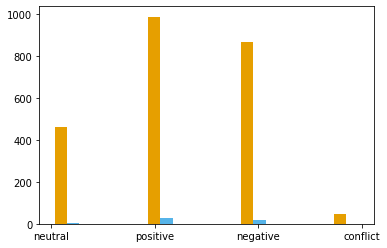

In [28]:
x1 = DF_train['polarity']
x2 = DF_test['polarity']

colors = ['#E69F00', '#56B4E9']
names = ['TRAIN', 'TEST']
         
plt.hist([x1, x2],color = colors, label=names)


#### Les nombres n'étant pas très pertinent pour étudier la répartition nous regarderons plutôt le pourcentage :

In [29]:
# NOMBRES
posTrain=len(DF_train[DF_train['polarity'] == 'positive' ].index)
negTrain=len(DF_train[DF_train['polarity'] == 'negative' ].index)
neuTrain=len(DF_train[DF_train['polarity'] == 'neutral' ].index)
confTrain=len(DF_train[DF_train['polarity'] == 'conflict' ].index)

posTest=len(DF_test[DF_test['polarity'] == 'positive' ].index)
negTest=len(DF_test[DF_test['polarity'] == 'negative' ].index)
neuTest=len(DF_test[DF_test['polarity'] == 'neutral' ].index)
confTest=len(DF_test[DF_test['polarity'] == 'conflict' ].index)

print(posTrain,negTrain,neuTrain,confTrain)
print(posTest,negTest,neuTest,confTest)

# TAUX
pos_train=len(DF_train[DF_train['polarity'] == 'positive' ].index)/len(DF_train)
neg_train=len(DF_train[DF_train['polarity'] == 'negative' ].index)/len(DF_train)
neu_train=len(DF_train[DF_train['polarity'] == 'neutral' ].index)/len(DF_train)
conf_train=len(DF_train[DF_train['polarity'] == 'conflict' ].index)/len(DF_train)

pos_test=len(DF_test[DF_test['polarity'] == 'positive' ].index)/len(DF_test)
neg_test=len(DF_test[DF_test['polarity'] == 'negative' ].index)/len(DF_test)
neu_test=len(DF_test[DF_test['polarity'] == 'neutral' ].index)/len(DF_test)
conf_test=len(DF_test[DF_test['polarity'] == 'conflict' ].index)/len(DF_test)

print(pos_train,neg_train,neu_train,conf_train)
print(pos_test,neg_test,neu_test,conf_test)


987 866 460 45
29 16 4 0
0.41857506361323155 0.3672603901611535 0.19508057675996607 0.019083969465648856
0.5918367346938775 0.32653061224489793 0.08163265306122448 0.0


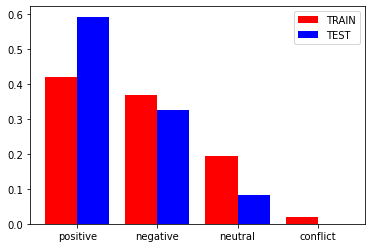

In [30]:
barWidth = 0.4
train = [pos_train, neg_train, neu_train, conf_train]
test = [pos_test, neg_test, neu_test, conf_test]
r1 = range(len(train))
r2 = [x + barWidth for x in r1]

plotTrain= plt.bar(r1, train, width = barWidth, color = ['red' for i in train])
plotTest= plt.bar(r2, test, width = barWidth, color = ['blue' for i in train])
plt.xticks([r + barWidth / 2 for r in range(len(train))], ['positive', 'negative', 'neutral','conflict'])
plt.legend([plotTrain, plotTest], ['TRAIN', 'TEST'])

**<font color="red"> Il n'y a pas de "conflict" dans l'ensemble de test, on ne prendra pas en compte ces valeurs. <font>**

**<font color="green">Les autres classes semblent bien réparties.</font>**

In [31]:
# On récupère les indexes qui contiennent des "conflicts"
indexNames = DF_train[DF_train['polarity'] == 'conflict' ].index
# on retire les lignes concernées
DF_train.drop(indexNames , inplace=True)

# On récupère les indexes qui contiennent des "conflicts"
indexNames = DF_test[DF_test['polarity'] == 'conflict' ].index
# on retire les lignes concernées
DF_test.drop(indexNames , inplace=True)

D:\Logiciel\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
# On récupère les indexes qui contiennent des "conflicts"
indexNames = DF_train[DF_train['polarity'] == 'conflict' ].index

# On récupère les indexes qui contiennent des "conflicts"
indexNames = DF_test[DF_test['polarity'] == 'conflict' ].index


**vérification rapide**

In [33]:
print(len(DF_test[DF_test['polarity'] == 'conflict' ].index))
print(len(DF_test[DF_test['polarity'] == 'conflict' ].index))

df_train.head(3)

0
0


,term,polarity,from,to,id,text,Score_by_word,PosTag,Sentiword,token_text
0,cord,neutral,41,45,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
1,battery life,positive,74,86,2339,I charge it at night and skip taking the cord ...,"[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [],...","[PRON, VERB, PRON, ADP, NOUN, CCONJ, NOUN, VER...","[I, charge, night, skip, taking, cord, good, b...","(I, charge, it, at, night, and, skip, taking, ..."
2,service center,negative,27,41,1316,The tech guy then said the service center does...,"[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0....","[DET, NOUN, NOUN, ADV, VERB, DET, NOUN, NOUN, ...","[The, tech, guy, said, service, center, 1-to-1...","(The, tech, guy, then, said, the, service, cen..."


In [3]:
# sauvegarder en Dataframe grace à .pkl
#DF_train.to_pickle('DF_train_PANDAS_DATAFRAME_LAPTOP.pkl')  
#DF_test.to_pickle('DF_test_PANDAS_DATAFRAME_LAPTOP.pkl')  
#Pour recharger les dataframe : 
DF_train = pd.read_pickle('DF_train_PANDAS_DATAFRAME_LAPTOP.pkl')
DF_test = pd.read_pickle('DF_test_PANDAS_DATAFRAME_LAPTOP.pkl')

In [4]:
DF_train.reset_index(inplace=True, drop=False)
DF_train[25:33]

,index,term,text,PosTag,Sentiword,Score_by_word,polarity,token_text
25,25,gaming,"However, the multi-touch gestures and large tr...","[ADV, PUNCT, DET, ADJ, ADJ, ADJ, NOUN, CCONJ, ...","[However, ,, multi-touch, gestures, large, tra...","[[0.125, 0.5, 0.375], [], [], [0.0, 0.0, 1.0],...",neutral,"(However, ,, the, multi, -, touch, gestures, a..."
26,26,suite of software,I love the way the entire suite of software wo...,"[PRON, VERB, DET, NOUN, DET, ADJ, NOUN, ADP, N...","[I, love, way, entire, suite, software, works,...","[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0....",positive,"(I, love, the, way, the, entire, suite, of, so..."
27,27,speed,The speed is incredible and I am more than sat...,"[DET, NOUN, AUX, ADJ, CCONJ, PRON, AUX, ADJ, S...","[The, speed, incredible, I, satisfied, .]","[[], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [],...",positive,"(The, speed, is, incredible, and, I, am, more,..."
28,28,Windows 7,This laptop meets every expectation and Window...,"[DET, NOUN, VERB, DET, NOUN, CCONJ, PROPN, NUM...","[This, laptop, meets, every, expectation, Wind...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...",positive,"(This, laptop, meets, every, expectation, and,..."
29,29,usb devices,I can barely use any usb devices because they ...,"[PRON, VERB, ADV, VERB, DET, NOUN, NOUN, SCONJ...","[I, barely, use, usb, devices, stay, connected...","[[], [0.125, 0.0, 0.875], [], [], [0.0, 0.0, 1...",negative,"(I, can, barely, use, any, usb, devices, becau..."
30,31,software,When I finally had everything running with all...,"[ADV, PRON, ADV, AUX, PRON, VERB, ADP, DET, DE...","[When, I, finally, everything, running, softwa...","[[], [], [0.0, 0.0, 1.0], [], [], [0.0, 0.0, 1...",neutral,"(When, I, finally, had, everything, running, w..."
31,32,system,When I finally had everything running with all...,"[ADV, PRON, ADV, AUX, PRON, VERB, ADP, DET, DE...","[When, I, finally, everything, running, softwa...","[[], [], [0.0, 0.0, 1.0], [], [], [0.0, 0.0, 1...",negative,"(When, I, finally, had, everything, running, w..."
32,33,Microsoft office for the mac,"One suggestion I do have, is to not bother get...","[NUM, NOUN, PRON, AUX, AUX, PUNCT, AUX, PART, ...","[One, suggestion, I, ,, bother, getting, Micro...","[[], [0.0, 0.0, 1.0], [], [], [], [], [], [0.0...",negative,"(One, suggestion, I, do, have, ,, is, to, not,..."


In [5]:
DF_test.head(3)

,term,text,PosTag,Sentiword,Score_by_word,polarity,token_text
0,aluminum body,I liked the aluminum body.,"[PRON, VERB, DET, NOUN, NOUN, PUNCT]","[I, liked, aluminum, body, .]","[[], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], []]",positive,"(I, liked, the, aluminum, body, .)"
1,screen,Lightweight and the screen is beautiful!,"[ADV, CCONJ, DET, NOUN, AUX, ADJ, PUNCT]","[Lightweight, screen, beautiful, !]","[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], []]",positive,"(Lightweight, and, the, screen, is, beautiful, !)"
2,build quality,"From the build quality to the performance, eve...","[ADP, DET, NOUN, NOUN, ADP, DET, NOUN, PUNCT, ...","[From, build, quality, performance, ,, everyth...","[[], [], [0.375, 0.0, 0.625], [0.125, 0.0, 0.8...",negative,"(From, the, build, quality, to, the, performan..."


In [6]:
DF_test.reset_index(inplace=True, drop=False)

In [7]:
# TRAIN DATASET
df_train = DF_train

list_train = []
label_train = []

for i in range(len(df_train)):
    pos_tag = [X.pos_ for X in df_train.token_text[i]]
    pos_tag_text = " ".join(pos_tag)

    senti_word = " ".join(df_train.Sentiword[i])
    score_by_word = ",".join(str(v) for v in df_train.Score_by_word[i])
    
    list_train.append(
        (df_train.term[i],
        df_train.text[i],
        pos_tag_text,
        senti_word,
        score_by_word,
        ))
    label_train.append(df_train.polarity[i])


import numpy as np
LAPTOP_Train = np.array(list_train)
print(LAPTOP_Train)

[['cord'
  'I charge it at night and skip taking the cord with me because of the good battery life.'
  'PRON VERB PRON ADP NOUN CCONJ NOUN VERB DET NOUN ADP PRON SCONJ ADP DET PROPN PROPN NOUN PUNCT'
  'I charge night skip taking cord good battery life .'
  '[],[],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[],[0.0, 0.0, 1.0],[0.75, 0.0, 0.25],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[]']
 ['battery life'
  'I charge it at night and skip taking the cord with me because of the good battery life.'
  'PRON VERB PRON ADP NOUN CCONJ NOUN VERB DET NOUN ADP PRON SCONJ ADP DET PROPN PROPN NOUN PUNCT'
  'I charge night skip taking cord good battery life .'
  '[],[],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[],[0.0, 0.0, 1.0],[0.75, 0.0, 0.25],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[]']
 ['service center'
  'The tech guy then said the service center does not do 1-to-1 exchange and I have to direct my concern to the "sales" team, which is the retail shop which I bought my netbook from.'
  'DET NOUN NOUN ADV VERB DET NOUN NOUN AUX PAR

In [8]:
# TEST DATASET
df_test = DF_test

list_test = []
label_test = []

for i in range(len(df_test)):
    pos_tag = [X.pos_ for X in  df_test.token_text[i]]
    pos_tag_text = " ".join(pos_tag)
    senti_word = " ".join(df_test.Sentiword[i])
    score_by_word = ",".join(str(v) for v in df_test.Score_by_word[i])
    
    list_test.append(
        (df_test.term[i],
        df_test.text[i],
        pos_tag_text,
        senti_word,
        score_by_word,
        ))
    label_test.append(df_test.polarity[i])


import numpy as np
LAPTOP_Test = np.array(list_test)
print(LAPTOP_Test)
#print(label_test)

[['aluminum body' 'I liked the aluminum body.'
  'PRON VERB DET NOUN NOUN PUNCT' 'I liked aluminum body .'
  '[],[],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[]']
 ['screen' 'Lightweight and the screen is beautiful!'
  'ADV CCONJ DET NOUN AUX ADJ PUNCT' 'Lightweight screen beautiful !'
  '[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[],[]']
 ['build quality'
  'From the build quality to the performance, everything about it has been sub-par from what I would have expected from Apple.'
  'ADP DET NOUN NOUN ADP DET NOUN PUNCT PRON ADP PRON AUX AUX ADJ ADJ ADJ ADP PRON PRON VERB AUX VERB ADP PROPN PUNCT'
  'From build quality performance , everything sub-par I would expected Apple .'
  '[],[],[0.375, 0.0, 0.625],[0.125, 0.0, 0.875],[],[],[],[],[],[],[0.0, 0.0, 1.0],[]']
 ['performance'
  'From the build quality to the performance, everything about it has been sub-par from what I would have expected from Apple.'
  'ADP DET NOUN NOUN ADP DET NOUN PUNCT PRON ADP PRON AUX AUX ADJ ADJ ADJ ADP PRON PRON VERB AUX VERB 

### Vectorisation — TF/IDF

* Aux fins de la plupart des modélisations mathématiques effectuées sur le texte et aux fins de cette expérimentation, différents processus de « vectorisation » ont été mis en oeuvre.

* Le contenu textuel seul ne peut pas être modifié et contraint dans l'espace mathématique sans être transformé en nombres dans le but d'être lu par un algorithme d'apprentissage automatique.

* C'est pourquoi pour les besoins des méthodes supervisées dans ce projet, différents types de vectorisation ont été utilisés pour convertir des données qualitatives en données quantitatives afin de les manipuler mathématiquement. Ces vecteurs deviennent des caractéristiques intégrées pour les modèles. 

**Fréquence de terme/Fréquence de document inverse (TF/IDF)**

Il s'agit de la technique de vectorisation utilisée pour le modèle Support Vector Machine. 
* TF/IDF a été déployé sur les données d'entraînement avec une approche unigramme qui compte chaque mot individuel comme un terme. La « fréquence des termes » correspond à la fréquence à laquelle un certain mot apparaît dans le texte, la « fréquence inverse du document » fait référence à la réduction de la signification des mots qui apparaissent le plus souvent dans tout le texte.
* Cela sert à faire des mots que l'on voit fréquemment dans un document donné mais pas nécessairement dans tous les documents. 

## SVM

### Premier test avec seulement la colonne text comme variable explicative

Ce premier test ne signifie pas grand chose, mais il permet de montrer l'efficacité de SVM. Il doit prédire sans savoir le term à analyser, et donc sans savoir pourquoi la même phrase peut avoir une polarité positive et parfois négative.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(DF_train['text'])
test_vectors = vectorizer.transform(DF_test['text'])

import time
from sklearn import svm
from sklearn.metrics import classification_report

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, DF_train['polarity'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

report = classification_report(DF_test['polarity'], prediction_linear, output_dict=True)


print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('neutral: ', report['neutral'])


Training time: 0.540410s; Prediction time: 0.009003s
positive:  {'precision': 0.8620689655172413, 'recall': 0.8620689655172413, 'f1-score': 0.8620689655172413, 'support': 29}
negative:  {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75, 'support': 16}
neutral:  {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 4}


Les résultats sont très intéressants malgré qu'ils ne soient pas interprétable. 
<font color='red'> Cependant ce n'est pas ce que nous cherchons. Là, notre modèle prédit positif ou négatif sans savoir le term dont il s'agit. Il n'a que les phrases pour prédire. <font>

### On doit d'abord normaliser les dimensions de nos listes. De sorte que la liste ait toujours le même nombre de features. 

In [10]:
L = len(LAPTOP_Test)
X_test = []
y_test = []
for i in range(0,L):
    X_test.append(LAPTOP_Test[i][0] + " " + LAPTOP_Test[i][1] + " " + LAPTOP_Test[i][2] + " " + LAPTOP_Test[i][3]+ " " + LAPTOP_Test[i][4])
    y_test.append(label_test[i])

X_test[0:3]

['aluminum body I liked the aluminum body. PRON VERB DET NOUN NOUN PUNCT I liked aluminum body . [],[],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[]',
 'screen Lightweight and the screen is beautiful! ADV CCONJ DET NOUN AUX ADJ PUNCT Lightweight screen beautiful ! [0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[],[]',
 'build quality From the build quality to the performance, everything about it has been sub-par from what I would have expected from Apple. ADP DET NOUN NOUN ADP DET NOUN PUNCT PRON ADP PRON AUX AUX ADJ ADJ ADJ ADP PRON PRON VERB AUX VERB ADP PROPN PUNCT From build quality performance , everything sub-par I would expected Apple . [],[],[0.375, 0.0, 0.625],[0.125, 0.0, 0.875],[],[],[],[],[],[],[0.0, 0.0, 1.0],[]']

In [11]:
L = len(LAPTOP_Train)
X_train = []
y_train = []
for i in range(0,L):
    X_train.append(LAPTOP_Train[i][0] + " " + LAPTOP_Train[i][1] + " " + LAPTOP_Train[i][2] + " " + LAPTOP_Train[i][3]+ " " + LAPTOP_Train[i][4])
    y_train.append(label_train[i])

X_train[0:3]

['cord I charge it at night and skip taking the cord with me because of the good battery life. PRON VERB PRON ADP NOUN CCONJ NOUN VERB DET NOUN ADP PRON SCONJ ADP DET PROPN PROPN NOUN PUNCT I charge night skip taking cord good battery life . [],[],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[],[0.0, 0.0, 1.0],[0.75, 0.0, 0.25],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[]',
 'battery life I charge it at night and skip taking the cord with me because of the good battery life. PRON VERB PRON ADP NOUN CCONJ NOUN VERB DET NOUN ADP PRON SCONJ ADP DET PROPN PROPN NOUN PUNCT I charge night skip taking cord good battery life . [],[],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[],[0.0, 0.0, 1.0],[0.75, 0.0, 0.25],[0.0, 0.0, 1.0],[0.0, 0.0, 1.0],[]',
 'service center The tech guy then said the service center does not do 1-to-1 exchange and I have to direct my concern to the "sales" team, which is the retail shop which I bought my netbook from. DET NOUN NOUN ADV VERB DET NOUN NOUN AUX PART AUX NUM NOUN CCONJ PRON AUX PART VERB DET

### Vectorisation avec TfidfTransformer

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Create feature vectors
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

X_train_tf = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_tf = tf_transformer.transform(X_test_counts)

print(X_train_counts.shape)
print(X_train_tf.shape)

print(X_test_counts.shape)
print(X_test_tf.shape)



(2313, 3079)
(2313, 3079)
(49, 3079)
(49, 3079)


On voit que le nombre de features est toujours le même.

In [14]:
# Test avec kernel=rbf
classifier_linear = svm.SVC(kernel='rbf')
t0 = time.time()
classifier_linear.fit(X_train_tf, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(X_test_tf)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

report = classification_report(y_test, prediction_linear, output_dict=True)

print("Accuracy total score :", accuracy_score(y_test, prediction_linear))

print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('neutral: ', report['neutral'])
print('------ REPORT ------')
report

Training time: 1.087121s; Prediction time: 0.019997s
Accuracy total score : 0.8367346938775511
positive:  {'precision': 0.8666666666666667, 'recall': 0.896551724137931, 'f1-score': 0.8813559322033899, 'support': 29}
negative:  {'precision': 0.7647058823529411, 'recall': 0.8125, 'f1-score': 0.787878787878788, 'support': 16}
neutral:  {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 4}
------ REPORT ------


{'negative': {'precision': 0.7647058823529411,
  'recall': 0.8125,
  'f1-score': 0.787878787878788,
  'support': 16},
 'neutral': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 4},
 'positive': {'precision': 0.8666666666666667,
  'recall': 0.896551724137931,
  'f1-score': 0.8813559322033899,
  'support': 29},
 'accuracy': 0.8367346938775511,
 'macro avg': {'precision': 0.8771241830065359,
  'recall': 0.7363505747126436,
  'f1-score': 0.7786337955829481,
  'support': 49},
 'weighted avg': {'precision': 0.8442577030812325,
  'recall': 0.8367346938775511,
  'f1-score': 0.8333071287066445,
  'support': 49}}

Les résultats sont déjà très bon, avec une précision de 0.88 pour les **positif**, 1.0 pour les **negatif** et 0.87 pour les **neutre**.

In [15]:
# Test avec kernel=poly
classifier_linear = svm.SVC(kernel='poly')
t0 = time.time()
classifier_linear.fit(X_train_tf, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(X_test_tf)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

report = classification_report(y_test, prediction_linear, output_dict=True)

print("Accuracy total score :", accuracy_score(y_test, prediction_linear))

print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('neutral: ', report['neutral'])
print('------ REPORT ------')
report

Training time: 1.221312s; Prediction time: 0.018000s
Accuracy total score : 0.9183673469387755
positive:  {'precision': 0.9032258064516129, 'recall': 0.9655172413793104, 'f1-score': 0.9333333333333333, 'support': 29}
negative:  {'precision': 0.9333333333333333, 'recall': 0.875, 'f1-score': 0.9032258064516129, 'support': 16}
neutral:  {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 4}
------ REPORT ------


{'negative': {'precision': 0.9333333333333333,
  'recall': 0.875,
  'f1-score': 0.9032258064516129,
  'support': 16},
 'neutral': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 4},
 'positive': {'precision': 0.9032258064516129,
  'recall': 0.9655172413793104,
  'f1-score': 0.9333333333333333,
  'support': 29},
 'accuracy': 0.9183673469387755,
 'macro avg': {'precision': 0.9455197132616487,
  'recall': 0.8635057471264368,
  'f1-score': 0.8979006656426011,
  'support': 49},
 'weighted avg': {'precision': 0.920956769804696,
  'recall': 0.9183673469387755,
  'f1-score': 0.9172826734380388,
  'support': 49}}

Après avoir testé des kernels sigmoid et linéaire également, le noyau Polynomial semble donner de meilleur résultat que ceux-ci, ainsi que le RBF précédemment, notamment pour les positifs et les neutres. 
Je garde donc cette typologie avec le kernel POLY.

# Petit plus 
------------------------------------------------------------------- 

### NEURAL NETWORK : FULLY CONNECTED LAYERS MODEL

In [42]:
# import the necessary packages
from keras.models import Sequential
from keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 200

# --------- TRAIN ------------ #
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
X_train_vect = pad_sequences(sequences_train,maxlen=max_len)
print(X_train_vect)
print(X_train_vect.shape)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)
print(encoded_Y_train.shape)
print(dummy_y_train.shape)

# --------- TEST ------------ #

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test_vect = pad_sequences(sequences_test,maxlen=max_len)
print(X_test_vect)
print(X_test_vect.shape)


encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
print(encoded_Y_test.shape)
print(dummy_y_test.shape)


[[ 0  0  0 ...  1  2  1]
 [ 0  0  0 ...  1  2  1]
 [ 0  0  0 ...  1  2  1]
 ...
 [ 0  0  0 ... 20  1 21]
 [ 0  0  0 ...  1  1 24]
 [ 0  0  0 ...  1  1 24]]
(2313, 200)
(2313,)
(2313, 3)
[[0 0 0 ... 1 2 1]
 [0 0 0 ... 1 2 1]
 [0 0 0 ... 1 2 1]
 ...
 [0 0 0 ... 1 2 1]
 [0 0 0 ... 1 2 1]
 [0 0 0 ... 1 2 1]]
(49, 200)
(49,)
(49, 3)


In [43]:
dummy_y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [51]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train_vect, dummy_y_train, epochs=150, batch_size=10)

# evaluate the keras model
loss, accuracy = model.evaluate(X_train_vect, dummy_y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss : %.2f' % loss)

Epoch 1/150
232/232 [==============================] - 1s 2ms/step - loss: 61.1463 - accuracy: 0.4272
Epoch 2/150
232/232 [==============================] - 0s 2ms/step - loss: 15.7323 - accuracy: 0.5932
Epoch 3/150
232/232 [==============================] - 0s 2ms/step - loss: 8.4993 - accuracy: 0.6969
Epoch 4/150
232/232 [==============================] - 0s 2ms/step - loss: 5.9445 - accuracy: 0.7432
Epoch 5/150
232/232 [==============================] - 0s 2ms/step - loss: 4.2849 - accuracy: 0.7821
Epoch 6/150
232/232 [==============================] - 0s 2ms/step - loss: 3.5007 - accuracy: 0.7994
Epoch 7/150
232/232 [==============================] - 0s 2ms/step - loss: 3.3117 - accuracy: 0.8054
Epoch 8/150
232/232 [==============================] - 0s 2ms/step - loss: 2.4841 - accuracy: 0.8249
Epoch 9/150
232/232 [==============================] - 0s 2ms/step - loss: 1.9621 - accuracy: 0.8301
Epoch 10/150
232/232 [==============================] - 0s 2ms/step - loss: 1.5746 - accu

* Cela permet de montrer que SVM peut être plus performant que certains modèles complexe comme les réseaux de neurones. 